## Forecasting with fine-tuning

Lastly I added fine-tuning.
After specified number of time steps I performed model fine-tuning to include additional collected observation data.
Visible difference in predictions appeared and for some parameters configuration model was able to predict all three true anomalies.

Parameters that could be optimized in addition to sequence length are e.g. : 
- optimizer's learning rate,
- anomalies detection threshold,
- fine-tuning step,
Optimization aim would be to maximize specificity and sensitivity as well, with sensitivity considered superior (as we prefer to raise alert needlessly than omit life-danger condition)
However, it is worth noting that in the end I only possessed medical data of one patient which I think is to little to perform reliable parameters optimization.

In [1]:
import sys
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append('../modules/')
from modules.NN_data_prep import set_seed, preprocess_series, prepare_dataset
from modules.NN_models import LSTMForecaster, LSTMAttentionForecaster
from modules.NN_model_usage import train_model, model_predict, detect_anomalies, plot_results, create_saving_path

In [2]:
param = 'puls'

df_aug = pd.read_csv('../../data/df_augmented_' + param + '.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df_aug.set_index('date', inplace=True)
series_aug = df_aug['aug_series_00001']

df_original = pd.read_csv('../../data/df_stl_interpolated.csv', parse_dates=['date'], date_format='%Y-%m-%d %H:%M:%S')
df_original.set_index('date', inplace=True)
series_original = df_original[param]

In [3]:
print(series_aug.head(2))
print(series_original.head(2))

date
2023-11-13 14:00:00    122
2023-11-13 15:00:00    128
Name: aug_series_00001, dtype: int64
date
2023-11-13 14:00:00    125
2023-11-13 15:00:00    130
Name: puls, dtype: int64


In [4]:
series_dict = {'series_original': series_original, 'series_aug': series_aug}
model_classes = [LSTMForecaster, LSTMAttentionForecaster]
seq_lengths = [2, 3, 5, 8, 12, 20]
# seq_lengths = [2, 3]

In [5]:
# training_series_length = 100
# finetuning_step = 50
# threshold_scaler = 1.

# for series_name, series in series_dict.items():
#     for model_class in model_classes:
#         x, y = preprocess_series(series)
#         if series_name == 'series_original':
#             anomalies = [49, 61, 69, 91, 94, 175, 231, 347]
#         elif series_name == 'series_aug':
#             anomalies = []
#         for seq_len in seq_lengths:
#             # print(f'seq_len={seq_len}')
#             set_seed(42)
#             model = model_class()
#             X, Y = prepare_dataset(y, seq_len)

            
#             pred = np.array([])
#             for i in range(0, len(X)):
#                 if i == training_series_length:
#                     # print(f'i={i}')
#                     # print(f'len(pred)={len(pred)}')
#                     # print(f'training_start=0')
#                     # print(f'training_end={training_series_length -1 }')
                    
#                     train_model(model,
#                                 X,
#                                 Y,
#                                 training_series_length,
#                                 epochs=training_series_length)
#                     initial_pred = model_predict(model, X[0:training_series_length + finetuning_step])
#                     pred = np.append(pred, initial_pred)
#                     # print(f'len(pred)={len(pred)}')
#                 if all([i > training_series_length, 
#                        (i - training_series_length) % finetuning_step == 0]):
#                     # print(f'i={i}')
                    
#                     training_start = i - finetuning_step
#                     training_end = i
#                     train_model(model, 
#                                 X[training_start:training_end],
#                                 Y[training_start:training_end],
#                                 epochs=finetuning_step)
#                     if training_end + finetuning_step <= len(X):
#                         new_pred = model_predict(model,
#                                                  X[training_end:training_end + finetuning_step])
#                     elif training_end + finetuning_step > len(X):
#                         new_pred = model_predict(model,
#                                                  X[training_end:])
#                     pred = np.append(pred, new_pred)
#                     # print(f'training_start={i- finetuning_step}')
#                     # print(f'training_end={i - 1}')
#                     # if len(range(training_end,len(X))) > 1:
#                     #     print(f'len(new_pred)={len(new_pred)}')
#                     # elif len(range(training_end,len(X))) == 1:
#                     #     print(f'len(new_pred)=1')
#                     # print(f'len(pred)={len(pred)}')
#                     # print(f'len(X)={len(X)}')
                    
            
#             detected_anomalies = detect_anomalies(pred, Y, seq_len, threshold_scaler=threshold_scaler)
            
#             saving_path = create_saving_path(
#                 model,
#                 seq_len,
#                 series_name,
#                 folder='12_forec_fine-tuning',
#                 subfolder=f'threshold_scaler_{threshold_scaler:03.2f}'.replace('.', '-'))
#             # saving_path = None
#             plot_results(
#                 x,
#                 y,
#                 pred,
#                 anomalies,
#                 detected_anomalies,
#                 training_series_length,
#                 seq_len,
#                 saving_path,
#                 finetuning=True,
#                 finetuning_step=finetuning_step)

In [6]:
# training_series_length = 100
# finetuning_step = 50
# threshold_scaler = 1.


# # model_classes = [LSTMForecaster, LSTMAttentionForecaster]
# model_classes = [LSTMForecaster]
# # series_dict = {'series_original': series_original, 'series_aug': series_aug}
# series_dict = {'series_original': series_original}

# detected_anomalies_dict = {}
# pred_dict = {}

# training_series_length = 100
# colors = ['orange', 'purple', 'seagreen', 'olive', 'saddlebrown', 'palevioletred']


# for series_name, series in series_dict.items():
#     for model_class in model_classes:
#         x, y = preprocess_series(series)
#         if series_name == 'series_original':
#             anomalies = [49, 61, 69, 91, 94, 175, 231, 347]
#         elif series_name == 'series_aug':
#             anomalies = []
#         for i, seq_len in enumerate(seq_lengths):
#             # print(f'seq_len={seq_len}')
            
#             anomalies_tilt = i * .05
#             pred_color=colors[i]
            
#             set_seed(42)
#             model = model_class()
#             X, Y = prepare_dataset(y, seq_len)

            
#             pred = np.array([])
#             for i in range(0, len(X)):
#                 if i == training_series_length:
#                     # print(f'i={i}')
#                     # print(f'len(pred)={len(pred)}')
#                     # print(f'training_start=0')
#                     # print(f'training_end={training_series_length -1 }')
                    
#                     train_model(model,
#                                 X,
#                                 Y,
#                                 training_series_length,
#                                 epochs=training_series_length)
#                     initial_pred = model_predict(model, X[0:training_series_length + finetuning_step])
#                     pred = np.append(pred, initial_pred)
#                     # print(f'len(pred)={len(pred)}')
#                 if all([i > training_series_length, 
#                        (i - training_series_length) % finetuning_step == 0]):
#                     # print(f'i={i}')
                    
#                     training_start = i - finetuning_step
#                     training_end = i
#                     train_model(model, 
#                                 X[training_start:training_end],
#                                 Y[training_start:training_end],
#                                 epochs=finetuning_step)
#                     if training_end + finetuning_step <= len(X):
#                         new_pred = model_predict(model,
#                                                  X[training_end:training_end + finetuning_step])
#                     elif training_end + finetuning_step > len(X):
#                         new_pred = model_predict(model,
#                                                  X[training_end:])
#                     pred = np.append(pred, new_pred)
#                     # print(f'training_start={i- finetuning_step}')
#                     # print(f'training_end={i - 1}')
#                     # if len(range(training_end,len(X))) > 1:
#                     #     print(f'len(new_pred)={len(new_pred)}')
#                     # elif len(range(training_end,len(X))) == 1:
#                     #     print(f'len(new_pred)=1')
#                     # print(f'len(pred)={len(pred)}')
#                     # print(f'len(X)={len(X)}')
                    
            
#             detected_anomalies = detect_anomalies(pred, Y, seq_len, threshold_scaler=threshold_scaler)

#             detected_anomalies_dict[seq_len] = detected_anomalies
#             pred_dict[seq_len] = pred
            
#     finetuning=True
#     plt.figure(figsize=(18,10))
    
#     if anomalies != []:
#         plt.scatter(x[anomalies], y[anomalies], s=200, color='red', alpha=1, label="True Anomalies")
        
#     plt.plot(x, y, label="True Data")
#     for i, seq_len in enumerate(seq_lengths):
#         pred = pred_dict[seq_len]
#         detected_anomalies = detected_anomalies_dict[seq_len]
#         pred_color = colors[i]
#         anomalies_tilt = i*.05
        
#         # plot_time_series_all(x, y, anomalies, pred, title=f"Time Series with Predictions and Anomalies, seq_len={seq_len}", pred_color=pred_color)
    
#         if pred is None:
#             pred_start = 0
#         else:
#             pred_start = len(x) - len(pred)
#             plt.plot(x[pred_start:], pred, label="seq_len=" + str(seq_len) + ", Predictions", linestyle='dashed', color=pred_color, alpha=.5)
#         # plt.xlabel("Time")
#         # if values_normalised:
#         #     plt.ylabel(parameter_name + " (normalised)")
#         # else:
#         #     plt.ylabel(parameter_name)
#         # # plt.title(title)
#         # plt.legend()
        
#         plt.scatter(x[detected_anomalies], y[detected_anomalies] + anomalies_tilt * np.sign(y[detected_anomalies]), color=pred_color,  label="seq_len=" + str(seq_len) + ", Detected Anomalies")
        
    
#     if finetuning:
#         finetuning_ends = list(range(training_series_length + finetuning_step, len(x), finetuning_step))
#         plt.vlines(x[finetuning_ends], -1, 1, colors='y', linestyles='dashed', label='finetuning moments')
#         plt.vlines(x[training_series_length], -1, 1, color='y', label='end of initial training')
    
#     else:
#         plt.vlines(x[training_series_length], -1, 1, color='y', label='end of training series')
    
#     plt.legend(loc='upper left', bbox_to_anchor=(0, -0.05))    
#     plt.title('Zestawienie wyników dla wszystkich testowanych długości sekwencji')


In [7]:
training_series_length = 100
finetuning_step = 50
threshold_scaler = 1.


model_classes = [LSTMForecaster, LSTMAttentionForecaster]
# model_classes = [LSTMForecaster]
series_dict = {'series_original': series_original, 'series_aug': series_aug}
# series_dict = {'series_original': series_original}

detected_anomalies_dict = {}
pred_dict = {}
results = {}

training_series_length = 100
colors = ['orange', 'purple', 'seagreen', 'olive', 'saddlebrown', 'palevioletred']

### only training (and results dict creation):

In [8]:
for series_name, series in series_dict.items():
    results[series_name] = {}
    for model_class in model_classes:
        results[series_name][model_class.__name__] = {}
        detected_anomalies_dict = {}
        pred_dict = {}
        
        x, y = preprocess_series(series)
        if series_name == 'series_original':
            anomalies = [49, 61, 69, 91, 94, 175, 231, 347]
        elif series_name == 'series_aug':
            anomalies = []
        for i, seq_len in enumerate(seq_lengths):           
            set_seed(42)
            model = model_class()
            X, Y = prepare_dataset(y, seq_len) 
            pred = np.array([])
            for i in range(0, len(X)):
                if i == training_series_length:            
                    train_model(model,
                                X,
                                Y,
                                training_series_length,
                                epochs=training_series_length)
                    initial_pred = model_predict(
                        model, X[0:training_series_length + finetuning_step])
                    pred = np.append(pred, initial_pred)
                    # print(f'len(pred)={len(pred)}')
                if all([i > training_series_length, 
                       (i - training_series_length) % finetuning_step == 0]):
                    # print(f'i={i}')
                    
                    training_start = i - finetuning_step
                    training_end = i
                    train_model(model, 
                                X[training_start:training_end],
                                Y[training_start:training_end],
                                epochs=finetuning_step)
                    if training_end + finetuning_step <= len(X):
                        new_pred = model_predict(
                            model, X[training_end:training_end + finetuning_step])
                    elif training_end + finetuning_step > len(X):
                        new_pred = model_predict(model,
                                                 X[training_end:])
                    pred = np.append(pred, new_pred)
                    # print(f'training_start={i- finetuning_step}')
                    # print(f'training_end={i - 1}')
                    # if len(range(training_end,len(X))) > 1:
                    #     print(f'len(new_pred)={len(new_pred)}')
                    # elif len(range(training_end,len(X))) == 1:
                    #     print(f'len(new_pred)=1')
                    # print(f'len(pred)={len(pred)}')
                    # print(f'len(X)={len(X)}')
                    
            
            detected_anomalies = detect_anomalies(pred, Y, seq_len, threshold_scaler=threshold_scaler)

            detected_anomalies_dict[seq_len] = detected_anomalies
            pred_dict[seq_len] = pred
            
        results[series_name][model_class.__name__]['pred_dict'] = pred_dict
        results[series_name][model_class.__name__]['detected_anomalies_dict'] = detected_anomalies_dict
            

### plot prediction comparison (utilising results dict created in previous cell)

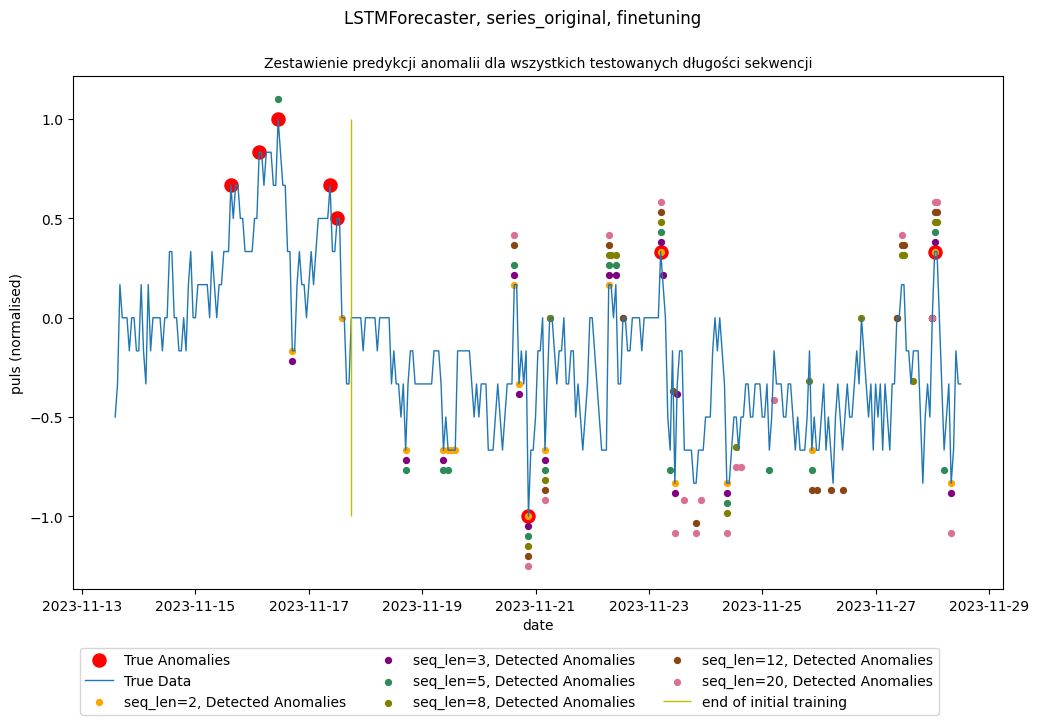

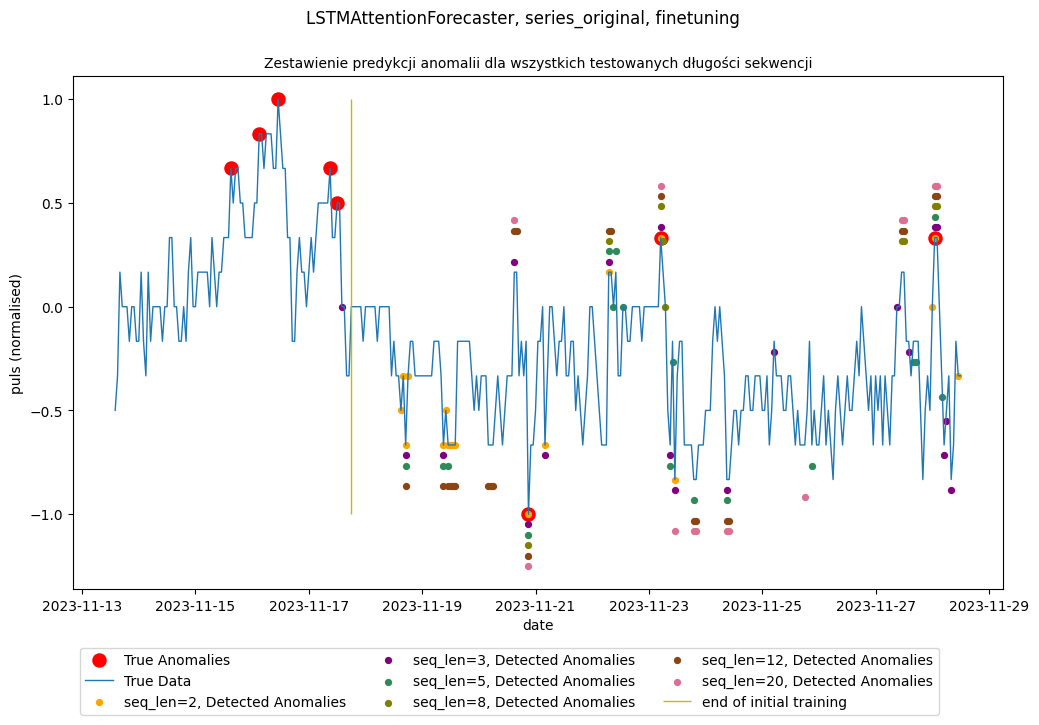

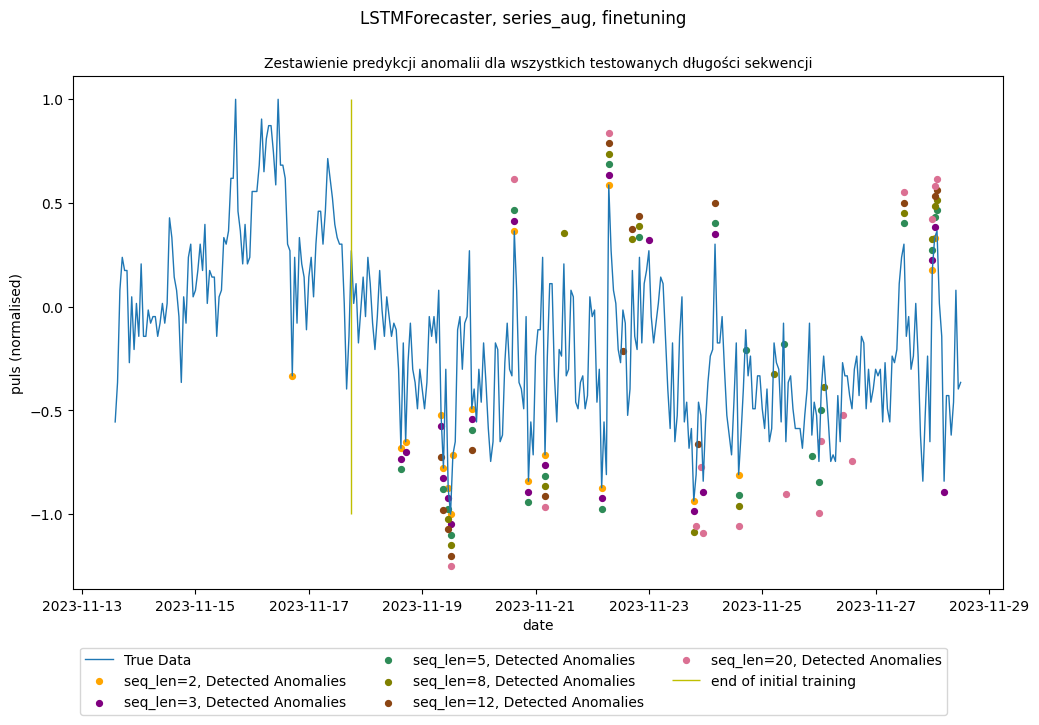

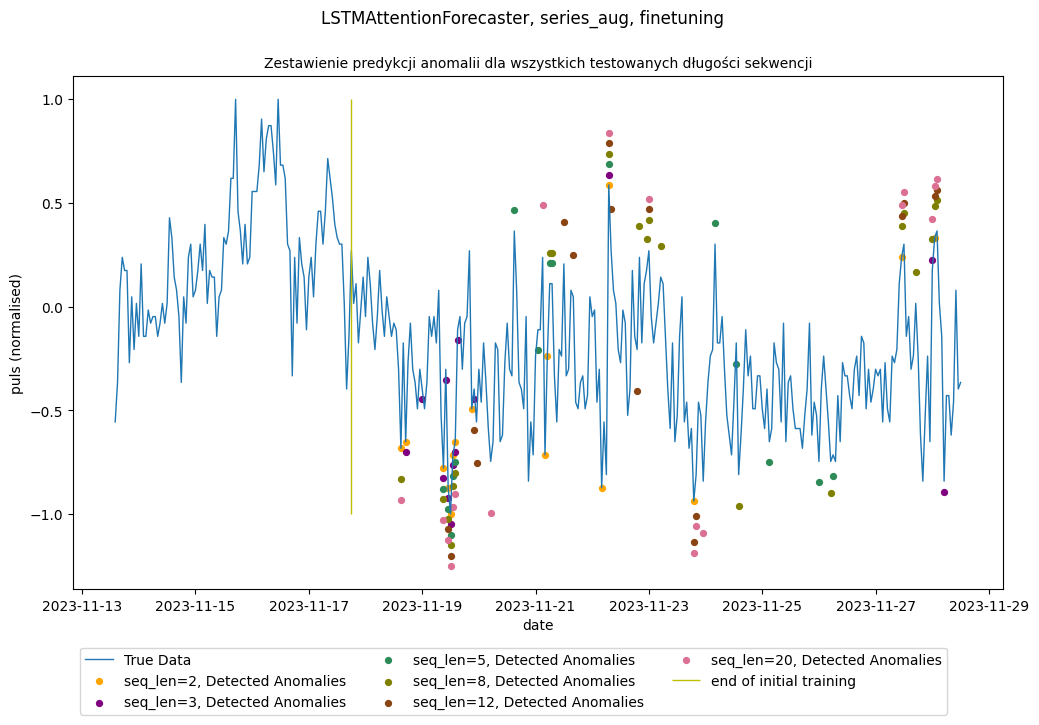

In [9]:
for series_name, series in series_dict.items():
    for model_class in model_classes:  
        detected_anomalies_dict = results[series_name][model_class.__name__]['detected_anomalies_dict']
        pred_dict = results[series_name][model_class.__name__]['pred_dict']
        
        x, y = preprocess_series(series)
        if series_name == 'series_original':
            anomalies = [49, 61, 69, 91, 94, 175, 231, 347]
        elif series_name == 'series_aug':
            anomalies = []

        finetuning=True
        fig_scaler = 3/2
        plt.figure(figsize=(18/fig_scaler,10/fig_scaler))
        line_width = 1.5/fig_scaler
        
        if anomalies != []:
            plt.scatter(x[anomalies], y[anomalies], s=200/(fig_scaler**2), color='red', alpha=1, label="True Anomalies")
            
        plt.plot(x, y, label="True Data", linewidth=line_width)
        for i, seq_len in enumerate(seq_lengths):
            pred = pred_dict[seq_len]
            detected_anomalies = detected_anomalies_dict[seq_len]
            pred_color = colors[i]
            anomalies_tilt = i*.05
        
            if pred is None:
                pred_start = 0
            else:
                pred_start = len(x) - len(pred)
                # plt.plot(x[pred_start:], pred, label="seq_len=" + str(seq_len) + ", Predictions", linestyle='dashed', color=pred_color, alpha=.5)
            
            # plt.xlabel("Time")
            # if values_normalised:
            #     plt.ylabel(parameter_name + " (normalised)")
            # else:
            #     plt.ylabel(parameter_name)
            # # plt.title(title)
            # plt.legend()
            
            plt.scatter(x[detected_anomalies], y[detected_anomalies] + anomalies_tilt * np.sign(y[detected_anomalies]), color=pred_color,  label="seq_len=" + str(seq_len) + ", Detected Anomalies", s=40/(fig_scaler**2))
            
        
        if finetuning:
            finetuning_ends = list(range(training_series_length + finetuning_step, len(x), finetuning_step))
            # plt.vlines(x[finetuning_ends], -1, 1, colors='y', linestyles='dashed', linewidth=line_width, label='finetuning moments')
            plt.vlines(x[training_series_length], -1, 1, color='y', linewidth=line_width, label='end of initial training')
        
        else:
            plt.vlines(x[training_series_length], -1, 1, color='y', linewidth=line_width, label='end of training series')
        
        plt.legend(loc='upper left', bbox_to_anchor=(0, -0.1), ncol=3)   
        plt.title('Zestawienie predykcji anomalii dla wszystkich testowanych długości sekwencji', fontsize = 15/fig_scaler)
        plt.suptitle(model_class.__name__ + ', ' + series_name + ", finetuning")
        plt.xlabel('date')
        plt.ylabel(param + ' (normalised)')

### plot all results (utilising results dict created in previous cell)

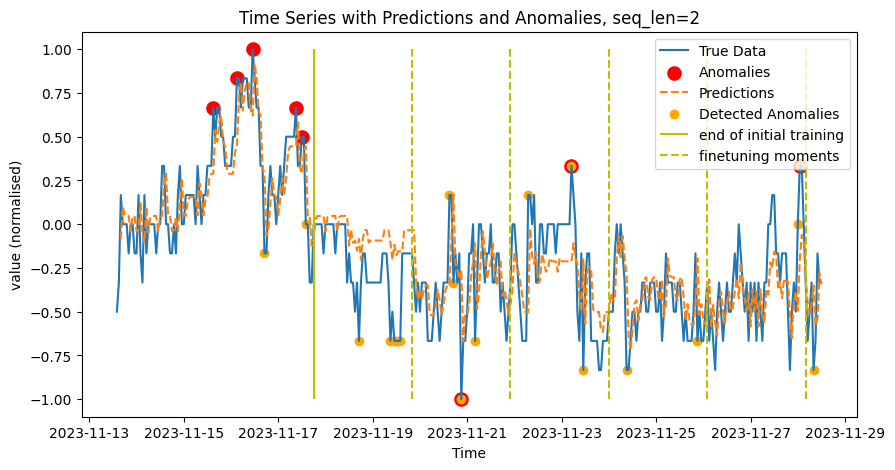

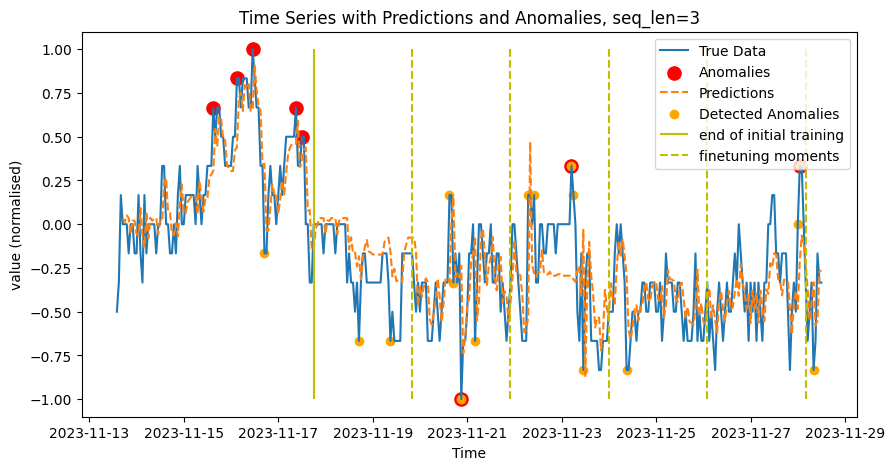

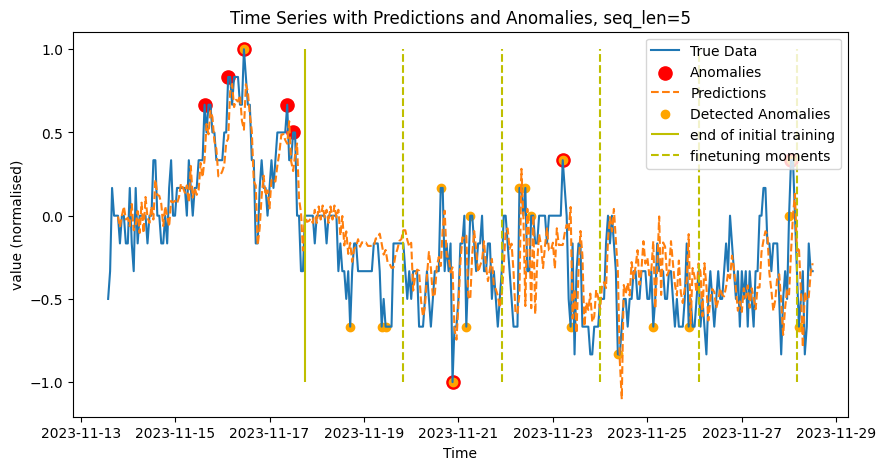

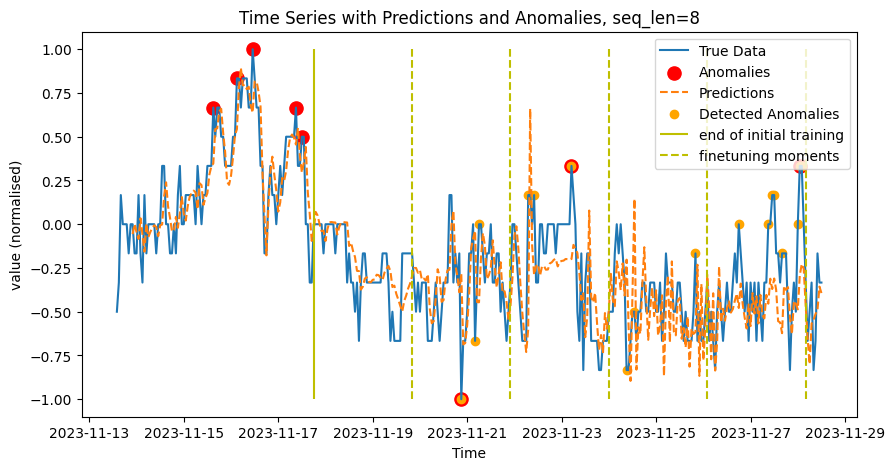

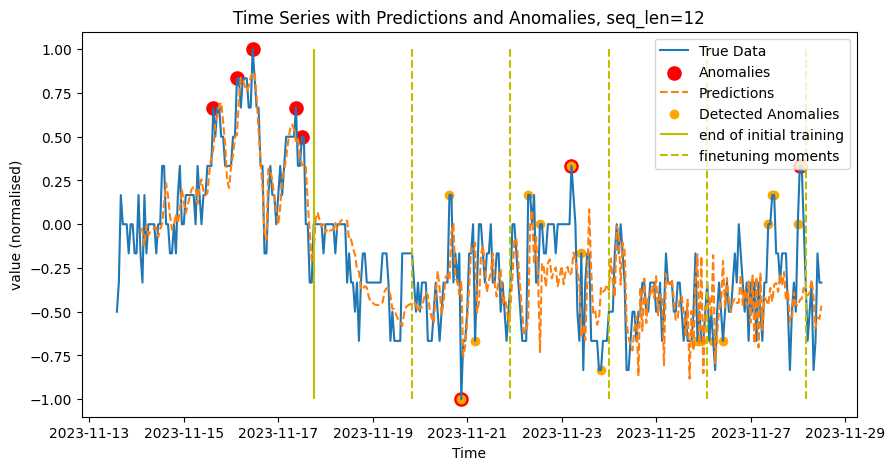

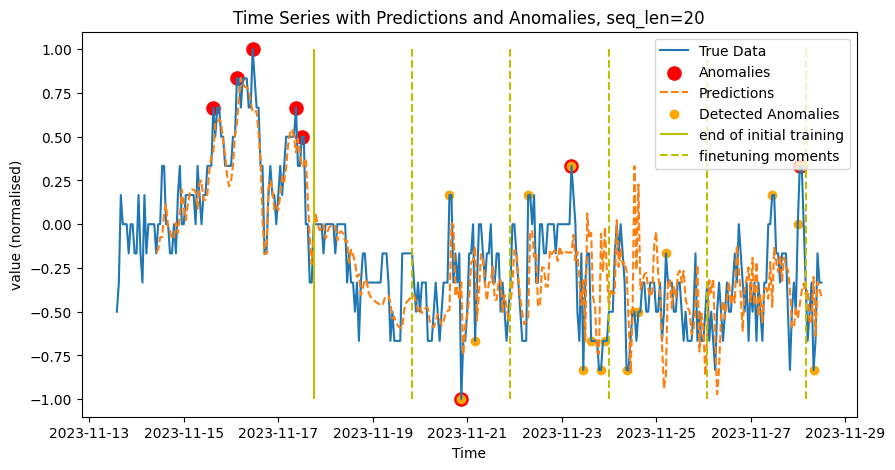

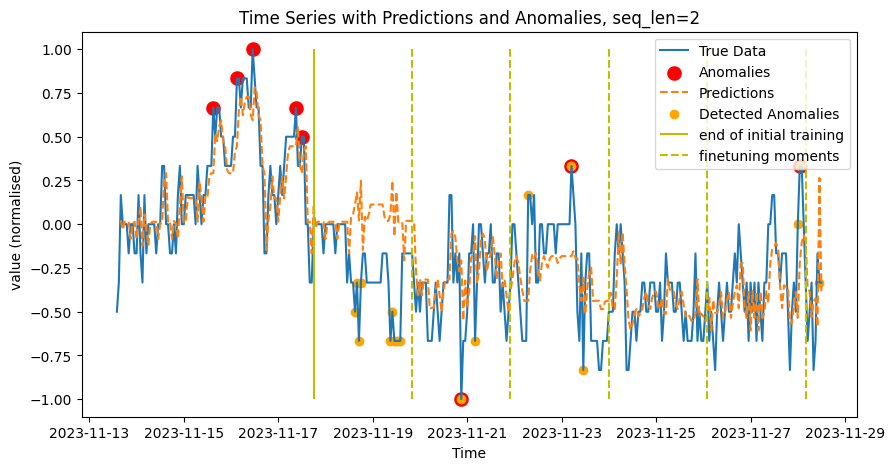

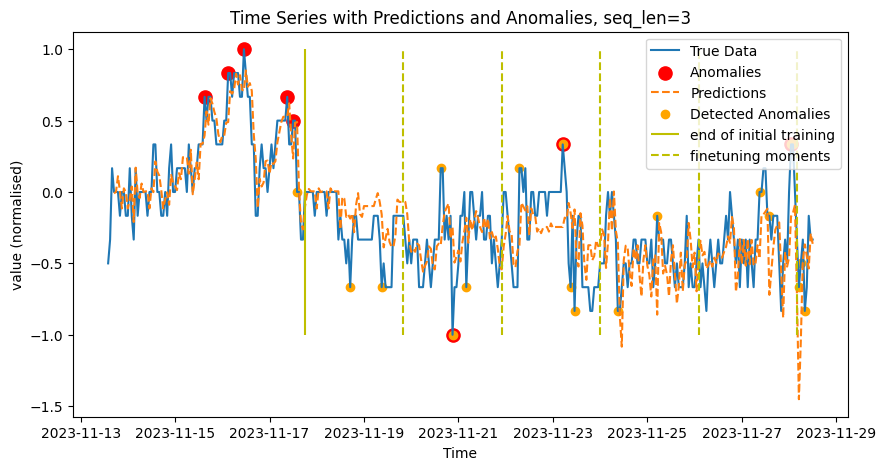

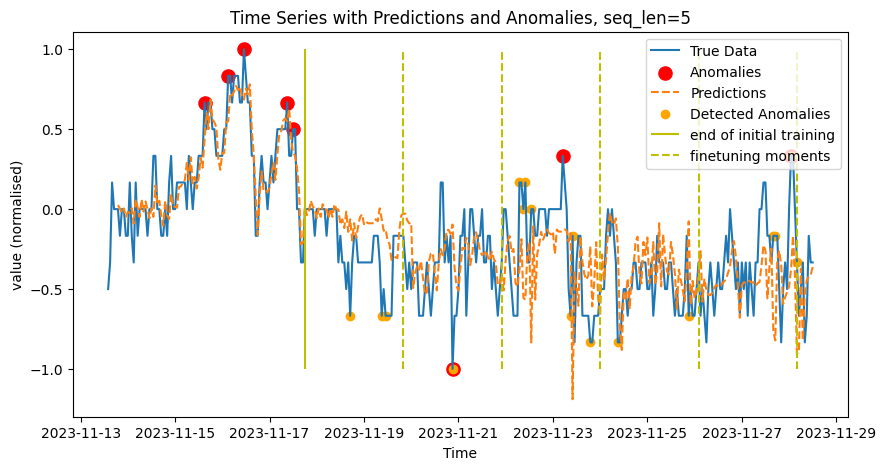

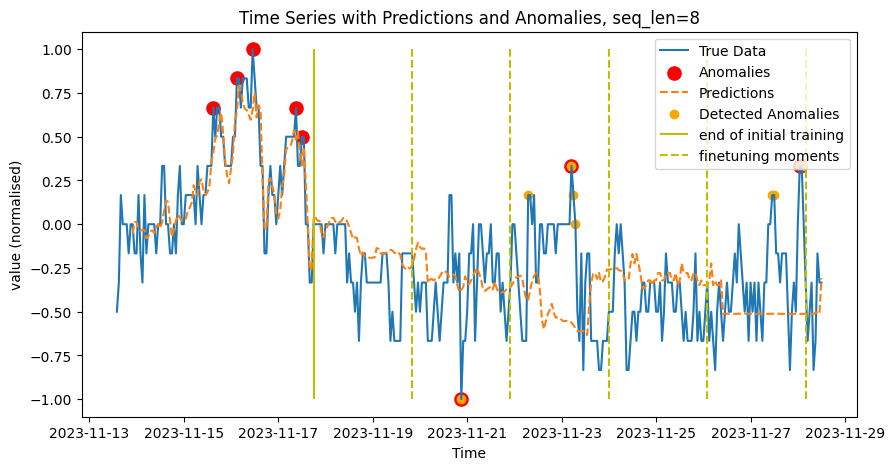

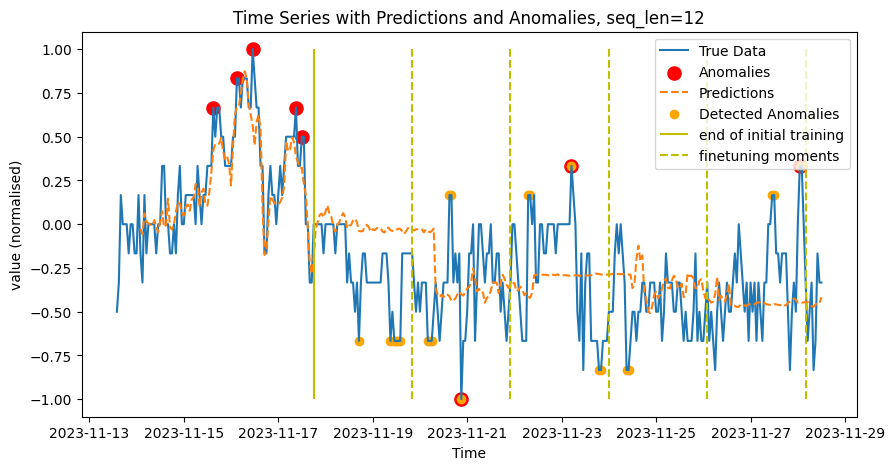

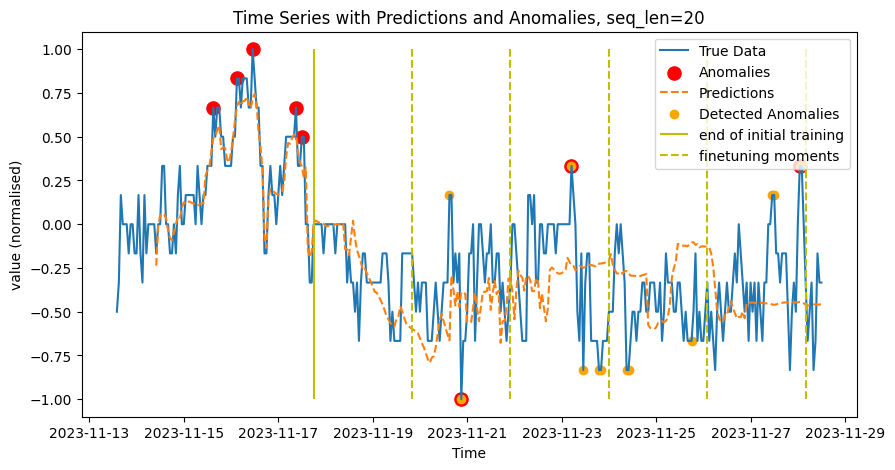

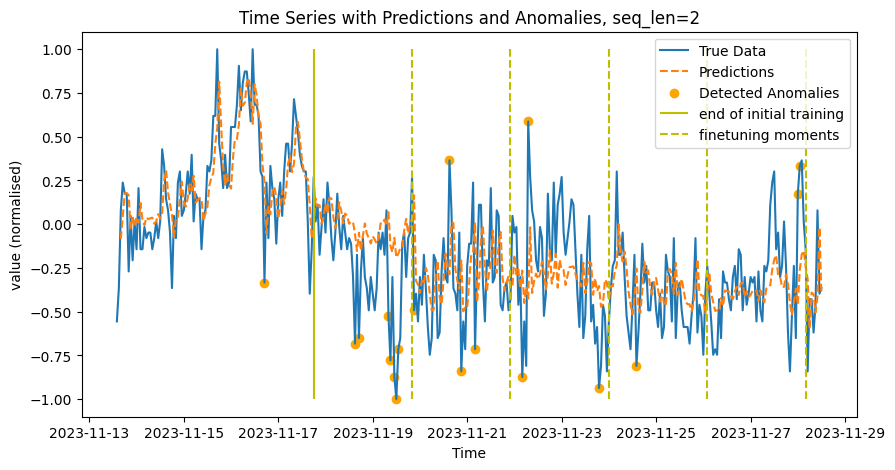

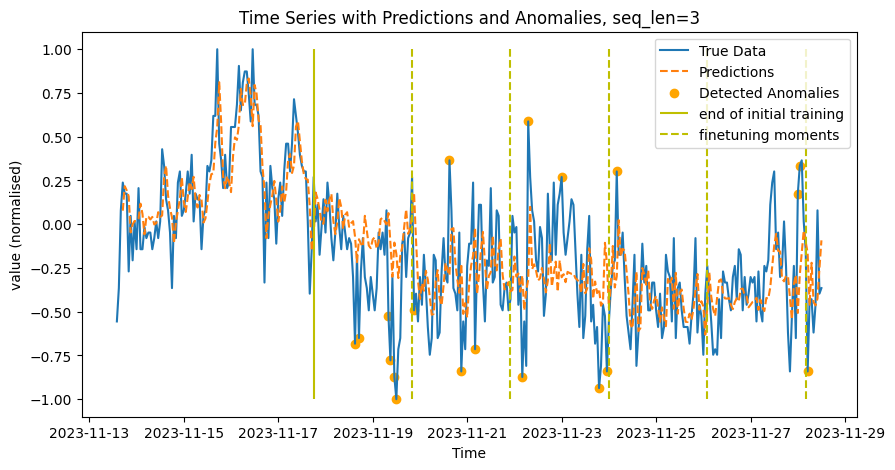

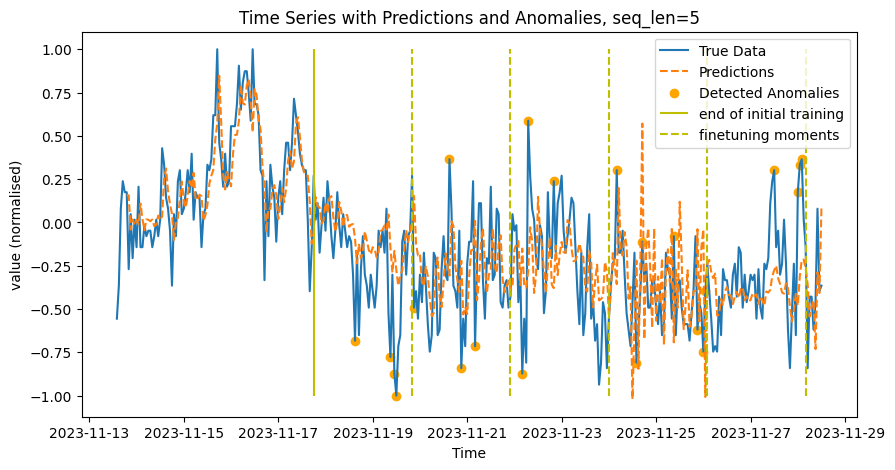

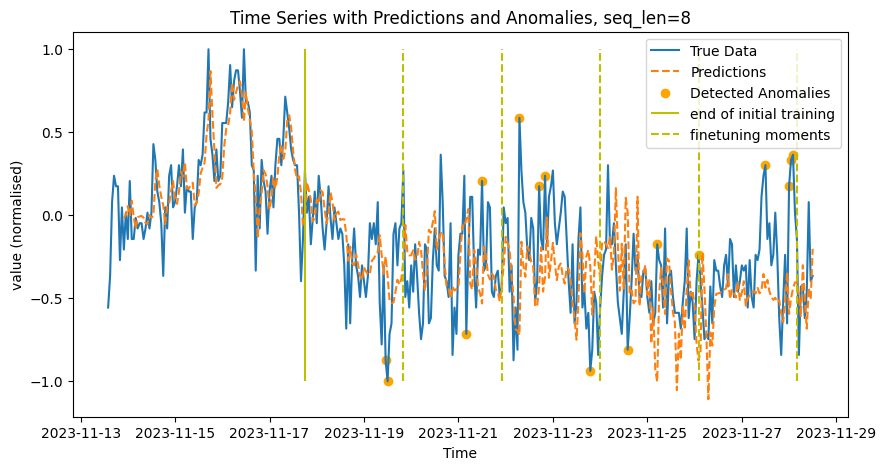

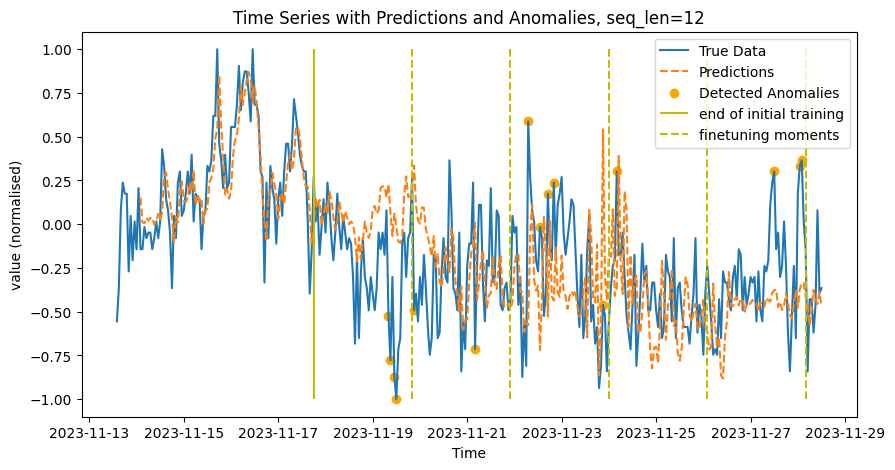

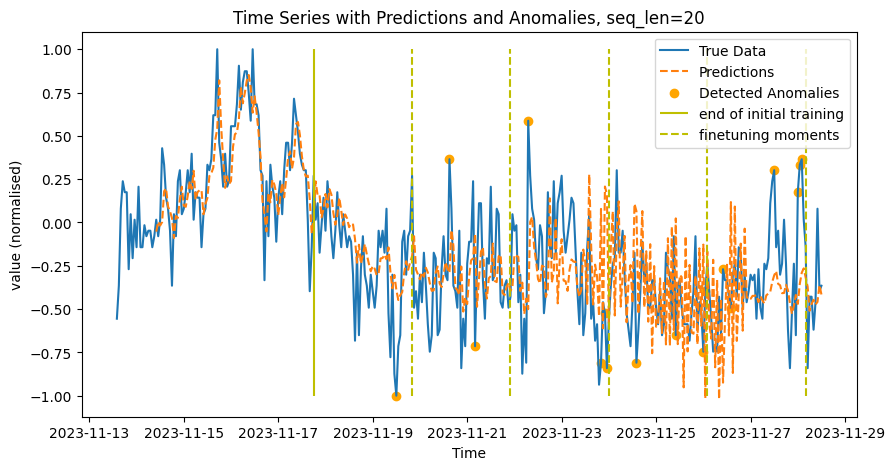

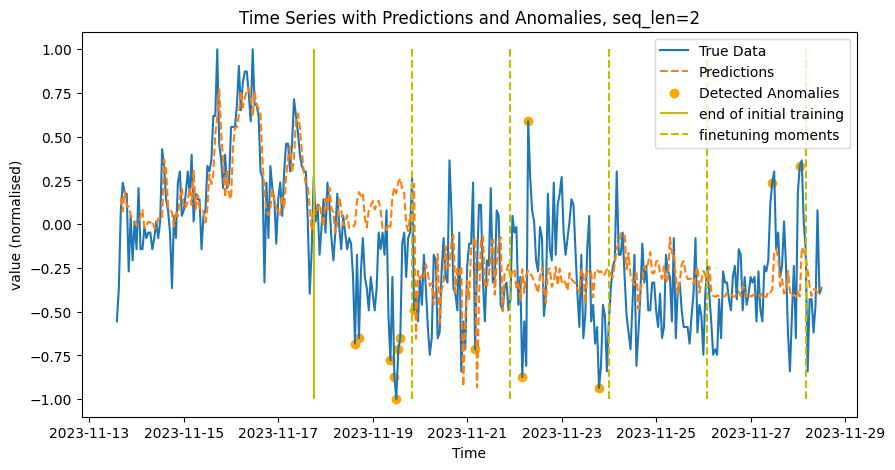

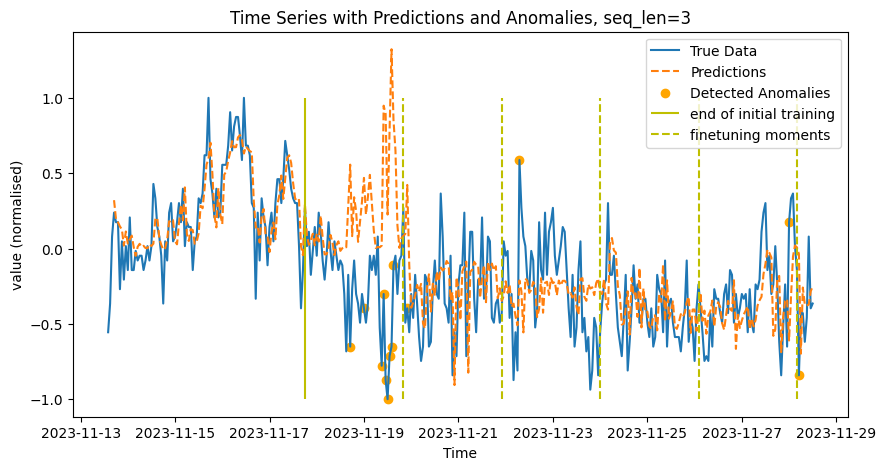

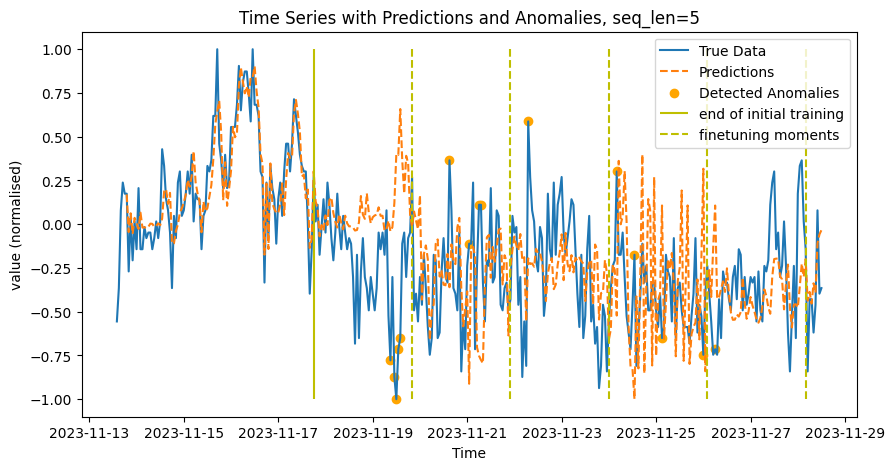

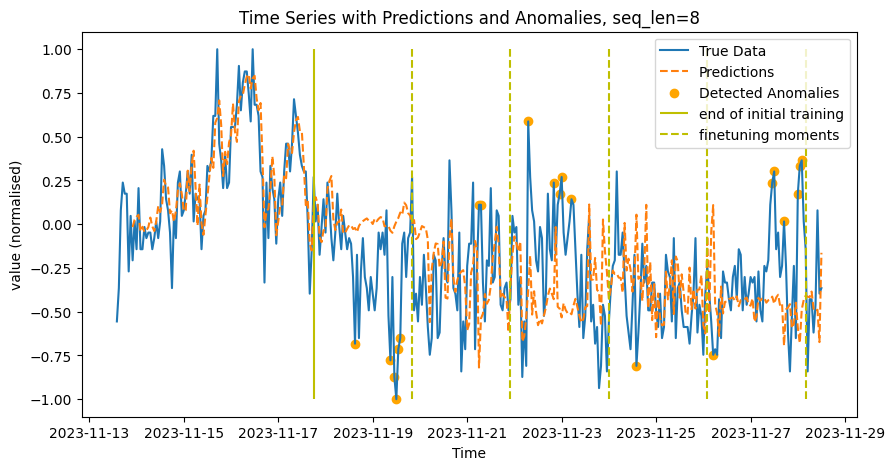

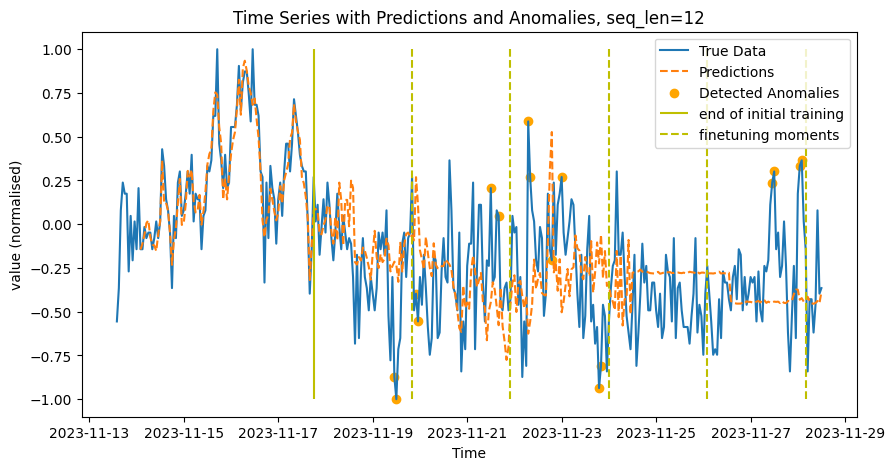

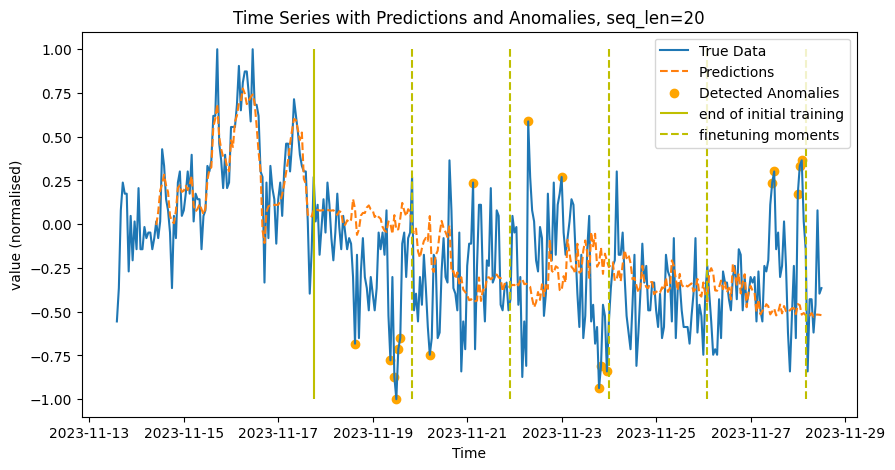

In [10]:
for series_name, series in series_dict.items():
    for model_class in model_classes:  
        detected_anomalies_dict = results[series_name][model_class.__name__]['detected_anomalies_dict']
        pred_dict = results[series_name][model_class.__name__]['pred_dict']
        
        x, y = preprocess_series(series)
        if series_name == 'series_original':
            anomalies = [49, 61, 69, 91, 94, 175, 231, 347]
        elif series_name == 'series_aug':
            anomalies = []
            
        for i, seq_len in enumerate(seq_lengths):
            pred = pred_dict[seq_len]
            detected_anomalies = detected_anomalies_dict[seq_len]
            pred_color = colors[i]
            
            saving_path = None
            plot_results(
                x,
                y,
                pred,
                anomalies,
                detected_anomalies,
                training_series_length,
                seq_len,
                saving_path,
                finetuning=True,
                finetuning_step=finetuning_step)